In [3]:
!date
!date

Tue Dec 15 21:47:36 UTC 2020
Tue Dec 15 21:47:36 UTC 2020


# Example Notebook 

1. Select an Area of Interest (AOI) using geojson.io
2. Create an Xarray using STAC and Cog

[POWERPOINT](https://docs.google.com/presentation/d/1CJn7WdcCQ6eeWiyULL051SOlVsuPQockOcHXykbDNWk/edit#slide=id.g50b8dd046d_0_0)

# AOI (Lake Rumira, Rwanda or Pine Lake California) 

### Build datacube/xarray via landsat-pds data lake by selecting scenes using STAC/sat-api

## Goals

1. Exploit Cloud Based Data Lakes
    - COGS
    - STAC
2. Zero footprint Infrastructure
3. Extremely lean - very few lines of code - small technology debt
4. Mashups are where its at!

## no indexing necssary


In [4]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt

env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


In [5]:
!ls ../aoi

hanoi.geojson  lake_rumira.geojson  pine-lake.geojson


In [6]:
import datetime
from litestacLib.ls_api import Litestac



In [5]:
my_aoi_file = '../aoi/lake_rumira.geojson'  #Gahiji lives there

date_range = (datetime.datetime(2013,2,1), datetime.datetime(2016,1,31))
# date_range = (datetime(2013,7,6), datetime(2018,7,7))

# es_index = 'rwanda'
# es_type = 'cube'

lc = Litestac()

measurements = ('red','green','blue',)

# return a pandas data frame product id creation date and red
panda_df = lc.search(my_aoi_file,
             time = date_range, measurements = measurements )


creating Litestac class
return_stac_hits
{'type': 'Polygon', 'coordinates': [[[30.211029052734375, -2.220055849443337], [30.25154113769531, -2.220055849443337], [30.25154113769531, -2.1576167016312597], [30.211029052734375, -2.1576167016312597], [30.211029052734375, -2.220055849443337]]]}
intersects search: 91 items
91 items
1 collections
[landsat-8-l1]
LC08_L1TP_172062_20160104_20170404_01_T1_B4.TIF
LC08_L1TP_172061_20160104_20170404_01_T1_B4.TIF
LC08_L1TP_172061_20151203_20170401_01_T1_B4.TIF
LC08_L1TP_172062_20151101_20170402_01_T1_B4.TIF
LC08_L1TP_172062_20151016_20170403_01_T1_B4.TIF
LC08_L1TP_172062_20150930_20180526_01_T1_B4.TIF
LC08_L1TP_172061_20150930_20180526_01_T1_B4.TIF
LC08_L1TP_172062_20150914_20170404_01_T1_B4.TIF
LC08_L1TP_172061_20150914_20170404_01_T1_B4.TIF
LC08_L1TP_172062_20150829_20170405_01_T1_B4.TIF
LC08_L1TP_172061_20150829_20170405_01_T1_B4.TIF
LC08_L1TP_172062_20150813_20170406_01_T1_B4.TIF
LC08_L1TP_172061_20150813_20170406_01_T1_B4.TIF
LC08_L1TP_172062_201

In [6]:
panda_df


product    band path  row        date  \
0   LC08_L1TP  B4.TIF  172  062  2016-01-04   
1   LC08_L1TP  B4.TIF  172  061  2016-01-04   
2   LC08_L1TP  B4.TIF  172  061  2015-12-03   
3   LC08_L1TP  B4.TIF  172  062  2015-11-01   
4   LC08_L1TP  B4.TIF  172  062  2015-10-16   
5   LC08_L1TP  B4.TIF  172  062  2015-09-30   
6   LC08_L1TP  B4.TIF  172  061  2015-09-30   
7   LC08_L1TP  B4.TIF  172  062  2015-09-14   
8   LC08_L1TP  B4.TIF  172  061  2015-09-14   
9   LC08_L1TP  B4.TIF  172  062  2015-08-29   
10  LC08_L1TP  B4.TIF  172  061  2015-08-29   
11  LC08_L1TP  B4.TIF  172  062  2015-08-13   
12  LC08_L1TP  B4.TIF  172  061  2015-08-13   
13  LC08_L1TP  B4.TIF  172  062  2015-07-28   
14  LC08_L1TP  B4.TIF  172  061  2015-07-28   
15  LC08_L1TP  B4.TIF  172  062  2015-07-12   
16  LC08_L1TP  B4.TIF  172  061  2015-07-12   
17  LC08_L1TP  B4.TIF  172  062  2015-06-26   
18  LC08_L1TP  B4.TIF  172  061  2015-06-26   
19  LC08_L1TP  B4.TIF  172  062  2015-06-10   
20  LC08_L1TP  B4.TIF  172  061  2015-06-10   
21  LC08_L1TP  B4.TIF  172  062  2015-05-25   
22  LC08_L1TP  B4.TIF  172  061  2015-05-25   
23  LC08_L1TP  B4.TIF  172  062  2015-04-07   
24  LC08_L1TP  B4.TIF  172  062  2015-03-22   
25  LC08_L1TP  B4.TIF  172  062  2015-03-06   
26  LC08_L1TP  B4.TIF  172  061  2015-03-06   
27  LC08_L1TP  B4.TIF  172  061  2015-02-18   
28  LC08_L1TP  B4.TIF  172  062  2015-02-02   
29  LC08_L1TP  B4.TIF  172  061  2015-02-02   
..        ...     ...  ...  ...         ...   
61  LC08_L1TP  B4.TIF  172  061  2014-03-03   
62  LC08_L1TP  B4.TIF  172  062  2014-02-15   
63  LC08_L1TP  B4.TIF  172  061  2014-02-15   
64  LC08_L1TP  B4.TIF  172  062  2014-01-30   
65  LC08_L1TP  B4.TIF  172  061  2014-01-30   
66  LC08_L1TP  B4.TIF  172  062  2014-01-14   
67  LC08_L1TP  B4.TIF  172  061  2014-01-14   
68  LC08_L1TP  B4.TIF  172  061  2013-12-29   
69  LC08_L1TP  B4.TIF  172  062  2013-10-26   
70  LC08_L1TP  B4.TIF  172  061  2013-10-26   
71  LC08_L1TP  B4.TIF  172  062  2013-10-10   
72  LC08_L1TP  B4.TIF  172  061  2013-10-10   
73  LC08_L1TP  B4.TIF  172  062  2013-09-24   
74  LC08_L1TP  B4.TIF  172  061  2013-09-24   
75  LC08_L1TP  B4.TIF  172  062  2013-09-08   
76  LC08_L1TP  B4.TIF  172  061  2013-09-08   
77  LC08_L1TP  B4.TIF  172  062  2013-08-23   
78  LC08_L1TP  B4.TIF  172  061  2013-08-23   
79  LC08_L1TP  B4.TIF  172  062  2013-08-07   
80  LC08_L1TP  B4.TIF  172  061  2013-08-07   
81  LC08_L1TP  B4.TIF  172  062  2013-07-22   
82  LC08_L1TP  B4.TIF  172  061  2013-07-22   
83  LC08_L1TP  B4.TIF  172  062  2013-07-06   
84  LC08_L1TP  B4.TIF  172  061  2013-07-06   
85  LC08_L1TP  B4.TIF  172  062  2013-06-20   
86  LC08_L1TP  B4.TIF  172  061  2013-06-20   
87  LC08_L1TP  B4.TIF  172  062  2013-06-04   
88  LC08_L1TP  B4.TIF  172  061  2013-06-04   
89  LC08_L1TP  B4.TIF  172  062  2013-05-19   
90  LC08_L1TP  B4.TIF  172  061  2013-05-19   

                                                  red  \
0   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
1   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
2   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
3   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
4   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
5   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
6   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
7   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
8   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
9   https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
10  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
11  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
12  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
13  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
14  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
15  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
16  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
17  https://landsat-pds.s3.amazonaws.com/c1/L8/172...   
18  http

In [1]:
from notebookLib.nb_display import Ldisplay
ld = Ldisplay()
ld.map_geojson(my_aoi_file)

creating Ldisplay class


NameError: name 'my_aoi_file' is not defined

In [8]:
# prune_panda_df = panda_df.loc[panda_df['path']=='127']
prune_panda_df = panda_df

In [9]:
ds = lc.load(my_aoi_file, measurements, prune_panda_df)

thanks for constructing an  Xpart
redfile is https://landsat-pds.s3.amazonaws.com/c1/L8/172/062/LC08_L1TP_172062_20160104_20170404_01_T1/LC08_L1TP_172062_20160104_20170404_01_T1_B4.TIF
geojson_file is ../aoi/lake_rumira.geojson
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7581, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32636), 'transform': Affine(30.0, 0.0, 120885.0,
       0.0, -30.0, -204285.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
CRS EPSG:32636
[[[30.211029052734375, -2.220055849443337], [30.25154113769531, -2.220055849443337], [30.25154113769531, -2.1576167016312597], [30.211029052734375, -2.1576167016312597], [30.211029052734375, -2.220055849443337]]]
151 230
XS len 151
YS len 230
120900.0 -204300.0
120930.0 -204330.0
120960.0 -204360.0
120990.0 -204390.0
121020.0 -204420.0
121050.0 -204450.0
121080.0 -204480.0
121110.0 -204510.0
121140.0 -204540.0
151
230
(1149, 1379)
(2295, 2446)
TONY len of 

# Xarrays are THE BOMB!

In [10]:
ds

<xarray.Dataset>
Dimensions:  (datePR: 91, time: 91, x: 151, y: 230)
Coordinates:
  * datePR   (datePR) <U18 '2016-01-04_172_062' ... '2013-05-19_172_061'
  * time     (time) <U10 '2016-01-04' '2016-01-04' ... '2013-05-19' '2013-05-19'
  * y        (y) float64 -2.043e+05 -2.043e+05 ... -2.111e+05 -2.112e+05
  * x        (x) float64 1.209e+05 1.209e+05 1.21e+05 ... 1.254e+05 1.254e+05
Data variables:
    red      (datePR, y, x) int16 8844 8858 9289 9392 9005 9085 ... 0 0 0 0 0 0
    green    (datePR, y, x) int16 9215 9255 9481 9617 9426 9485 ... 0 0 0 0 0 0
    blue     (datePR, y, x) int16 9871 9947 10162 10301 10157 ... 0 0 0 0 0
Attributes:
    crs:      EPSG:32636

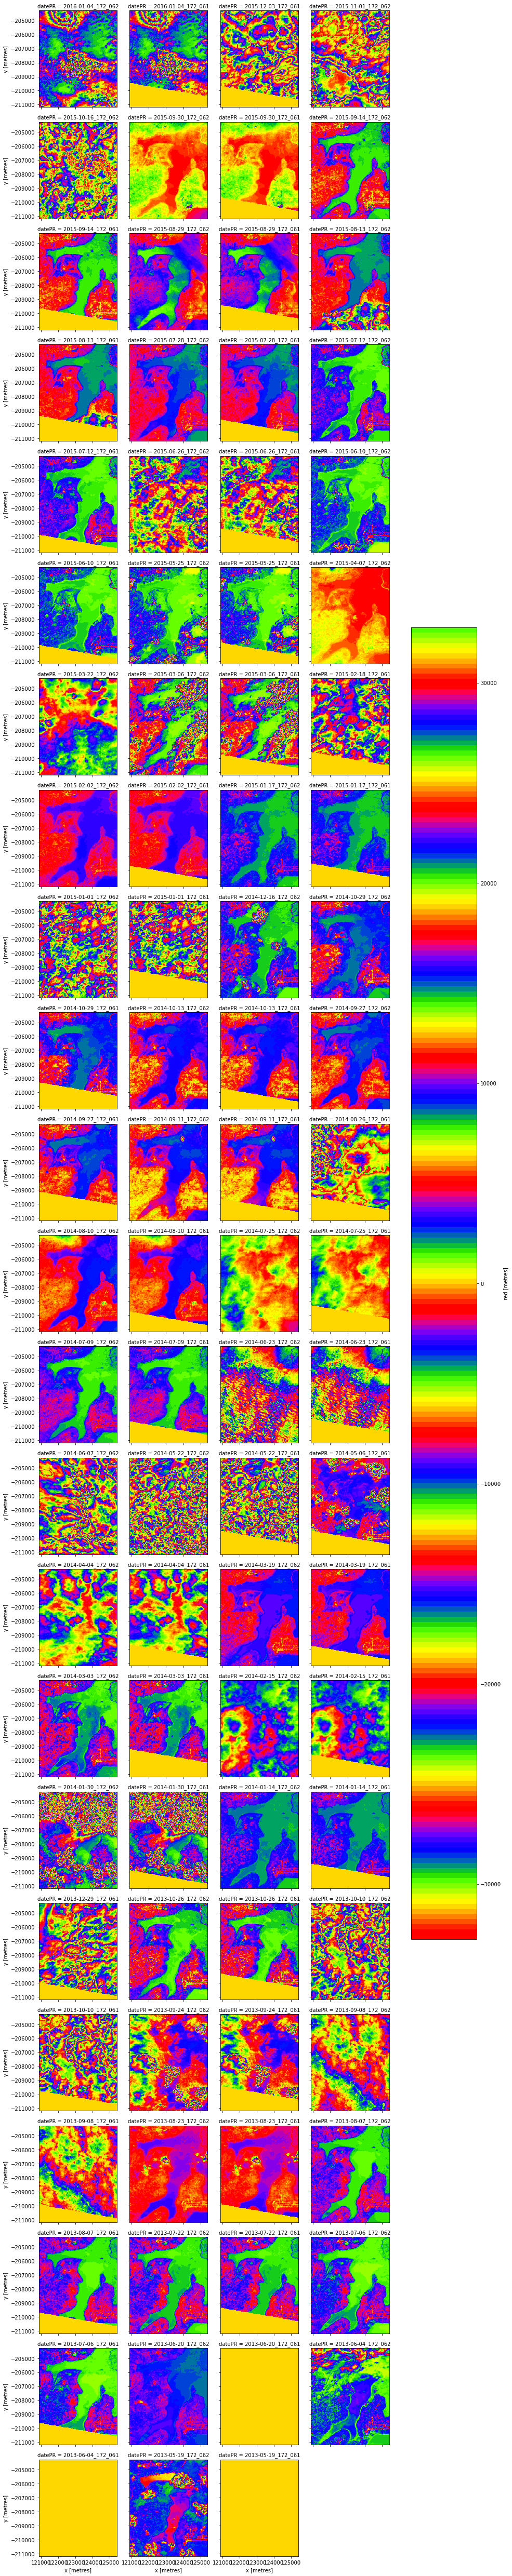

In [11]:
%matplotlib inline
display_color = 'red'
# 
ds[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

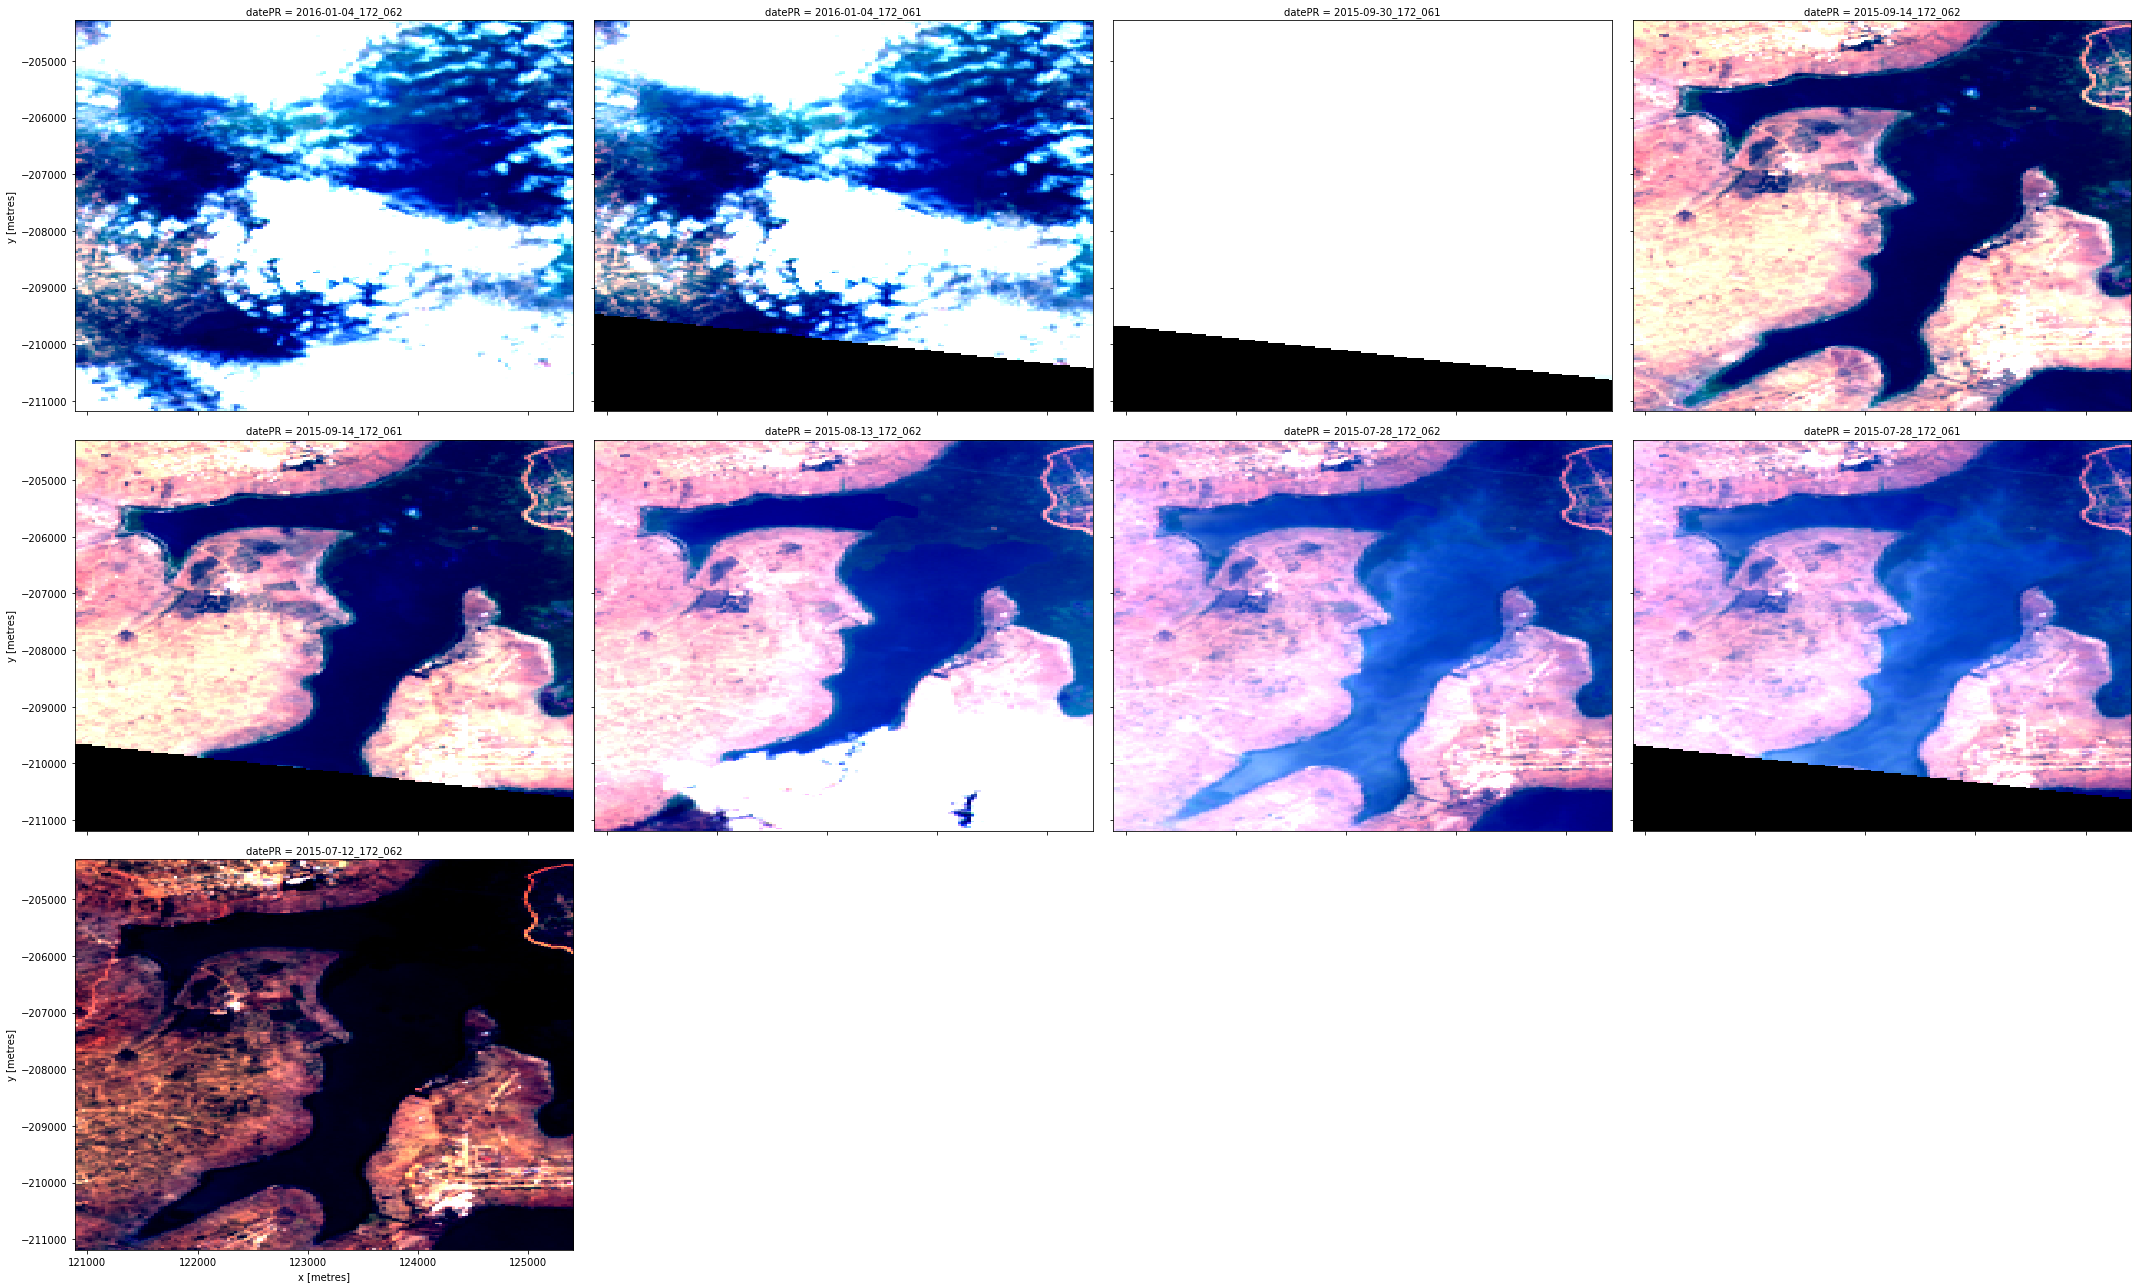

In [12]:
from notebookLib.nb_DEAPlotting import nb_rgb

nb_rgb(ds,bands = ['red', 'green', 'blue'], index = [0,1,6,7,8,11,13,14,15], index_dim='datePR',
       percentile_stretch=(.2,.70), aspect=1.2)

Generating 91 frame animation
    Exporting animation to ./rumira2.gif


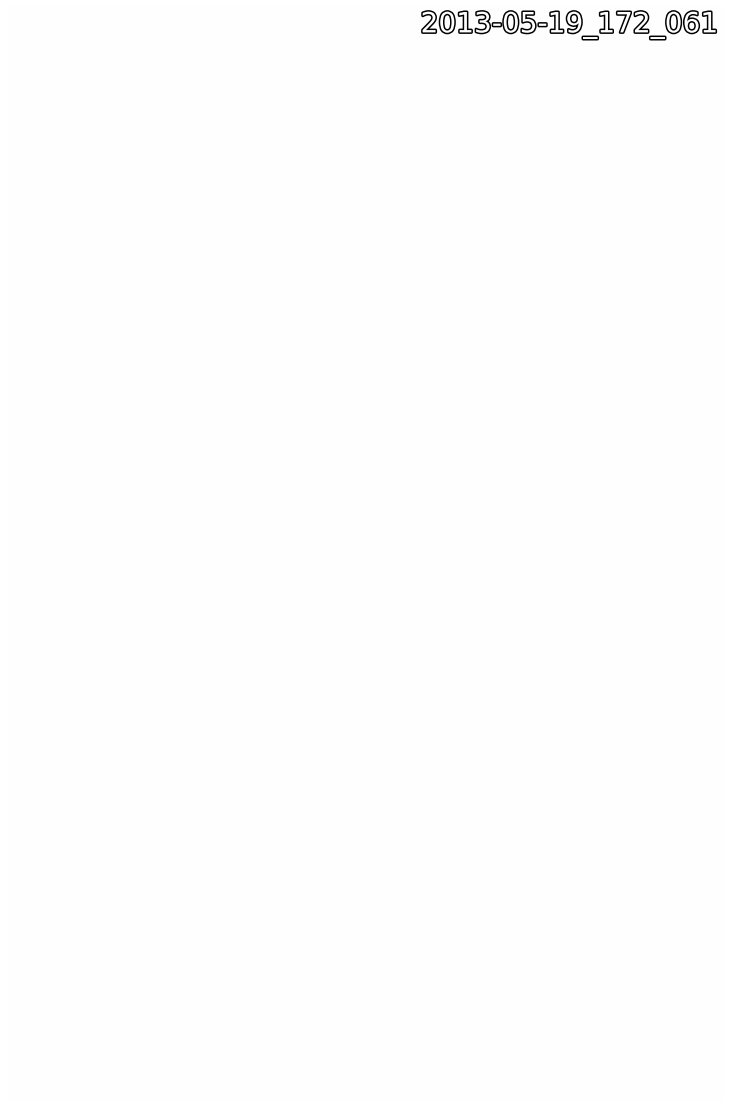

In [13]:
from notebookLib.nb_animate import nb_animated_timeseries

nb_animated_timeseries(ds,output_path='./rumira2.gif',bands = ['red', 'green', 'blue'], time_dim='datePR',  
      percentile_stretch=(.2,.85), interval=1200)

## WARNING Movie Below
[rumira2 movie click HERE](rumira2.gif)
# PLAY Movie Above

# date = yyyy-mm-dd  # defines my date 
### is my favorite image
## lets drill in with cog-explorer

In [14]:
from notebookLib.nb_mashup import nb_cog_explore
date = '2015-01-17'
pd = prune_panda_df 

url = nb_cog_explore(pd, date, '172', '062')

print(url)


2015-01-17
--------------------------------------------------------------------------------
https://landsat-pds.s3.amazonaws.com/c1/L8/172/062/LC08_L1TP_172062_20150117_20170414_01_T1/LC08_L1TP_172062_20150117_20170414_01_T1_B4.TIF
--------------------------------------------------------------------------------
https://landsat-pds.s3.amazonaws.com/c1/L8/172/062/LC08_L1TP_172062_20150117_20170414_01_T1/index.html
--------------------------------------------------------------------------------
https://geotiffjs.github.io/cog-explorer/#long=16.370&lat=48.210&zoom=5&scene=https://landsat-pds.s3.amazonaws.com/c1/L8/172/062/LC08_L1TP_172062_20150117_20170414_01_T1/index.html


# LINKS ABOVE demonstrate some of the mashups.

In [15]:
!date

Wed Sep 25 22:26:51 UTC 2019


# How do we get to LCMAP and CCDC using pyccd from here?

1. Load Collection 2 in the Oregon Region ow AWS S3.
2. It's Over - Go Home!